# <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30> Title

## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=20> Introduction

## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=20>Preliminary Results

In [118]:
# Loaded Libraries
library(tidyverse)
library(repr)
install.packages("expss")
library(expss)
library(ggplot2)
library(GGally)
library("gridExtra")
library(stringi)
library(cowplot)
library(digest)
library(infer)
library(datateachr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [122]:
bank_link <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJVzL4kjpn0J7YFzjTzCLlUKs0gtGThScWLRnezYxMjR5vE5PvwpHKrxJbKQjQ4AVp7QvS-a06yRFZ/pub?output=csv"
bank_data <- read_csv2(bank_link,                    
                        skip=1,
                    col_names = c("age","job", "marital", "education",  "default", "housing", "loan", "contact", 
                                  "month", "day_of_week", "duration","campaign", "pdays", "previous", "poutcome", 
                                  "emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor_3m", "nr_employed",
                                  "y"))
head(bank_data)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 4119 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (12): job, marital, education, default, housing, loan, contact, month, d...
dbl  (5): age, duration, campaign, pdays, previous

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,⋯,2,999,0,nonexistent,-18,92893,-462,1.313,50991,no
39,services,single,high.school,no,no,no,telephone,may,fri,⋯,4,999,0,nonexistent,11,93994,-364,4.855,5191,no
25,services,married,high.school,no,yes,no,telephone,jun,wed,⋯,1,999,0,nonexistent,14,94465,-418,4.962,52281,no
38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,⋯,3,999,0,nonexistent,14,94465,-418,4.959,52281,no
47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,⋯,1,999,0,nonexistent,-1,932,-42,4.191,51958,no
32,services,single,university.degree,no,no,no,cellular,sep,thu,⋯,3,999,2,failure,-11,94199,-375,0.884,49636,no


In [119]:
#select the data that we need
bank_data_sample <- bank_data %>%
                select(y, duration,euribor_3m)

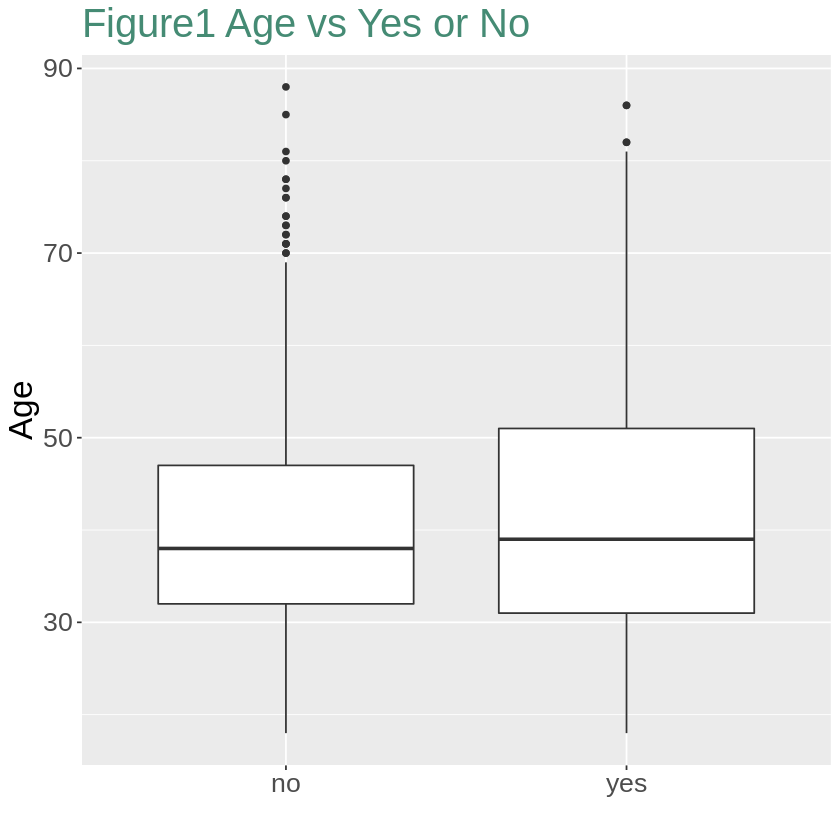

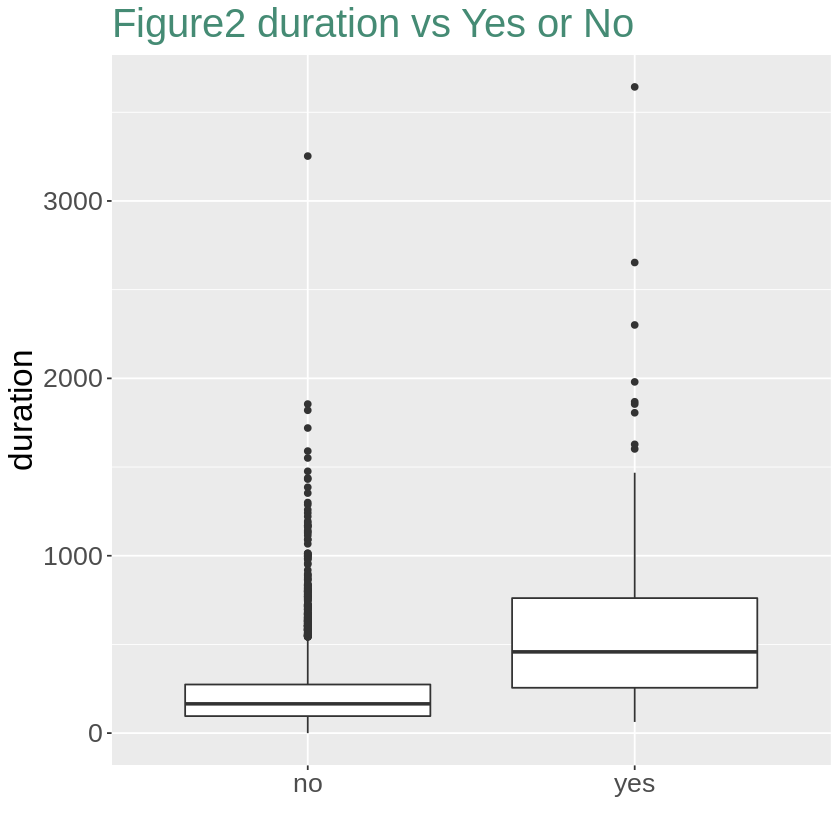

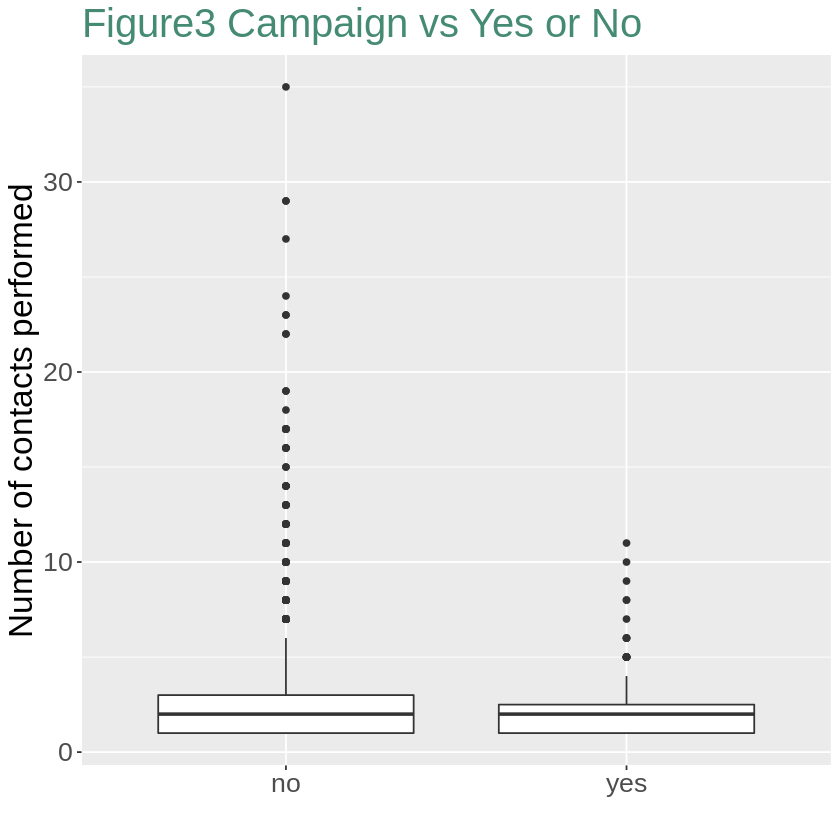

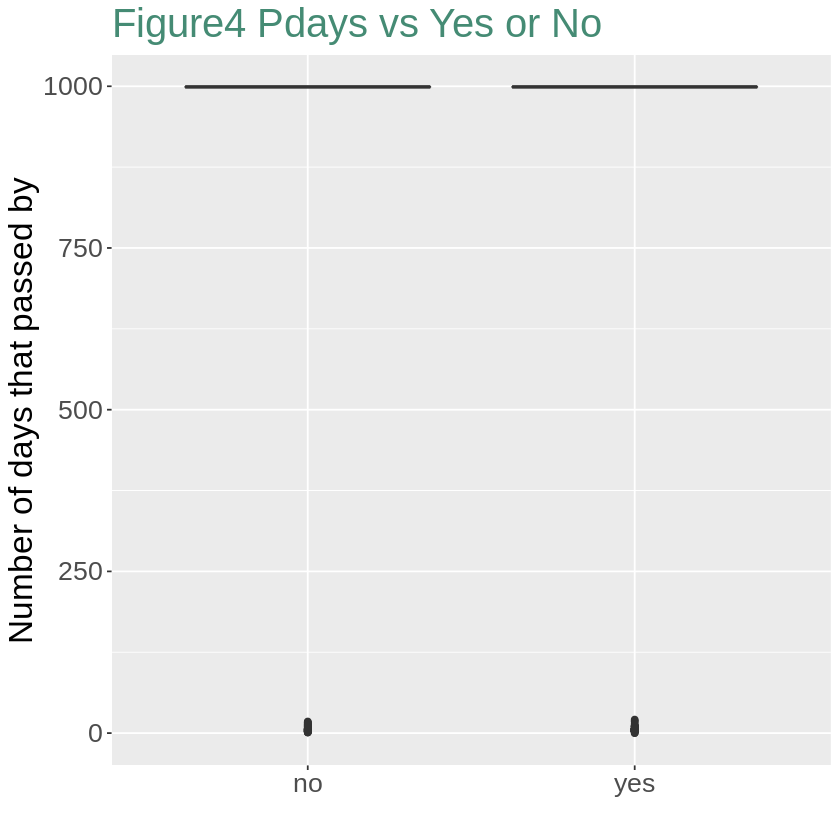

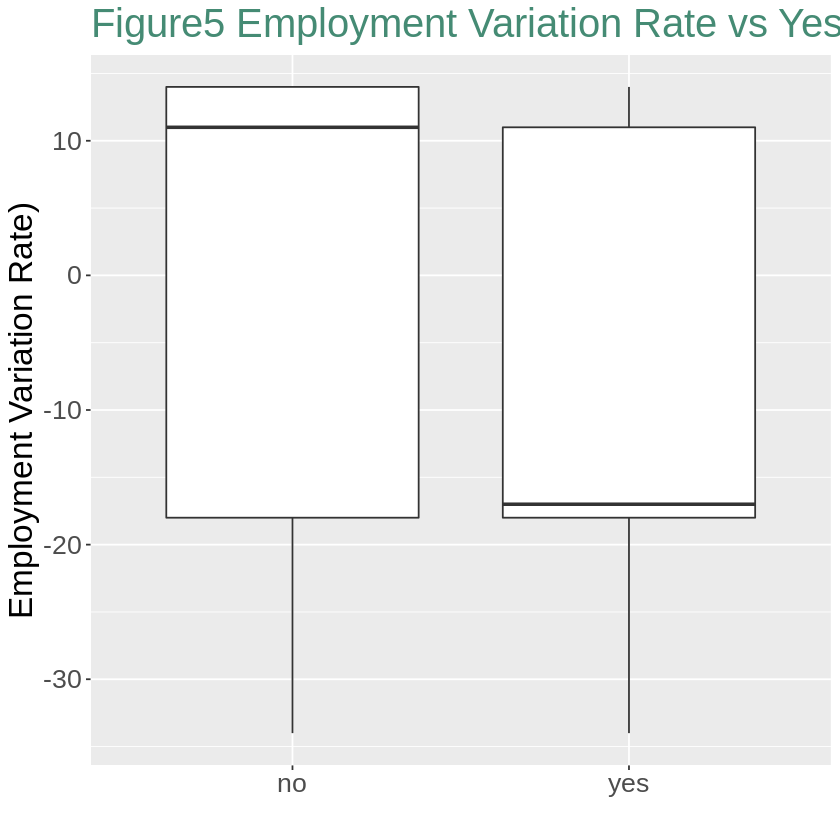

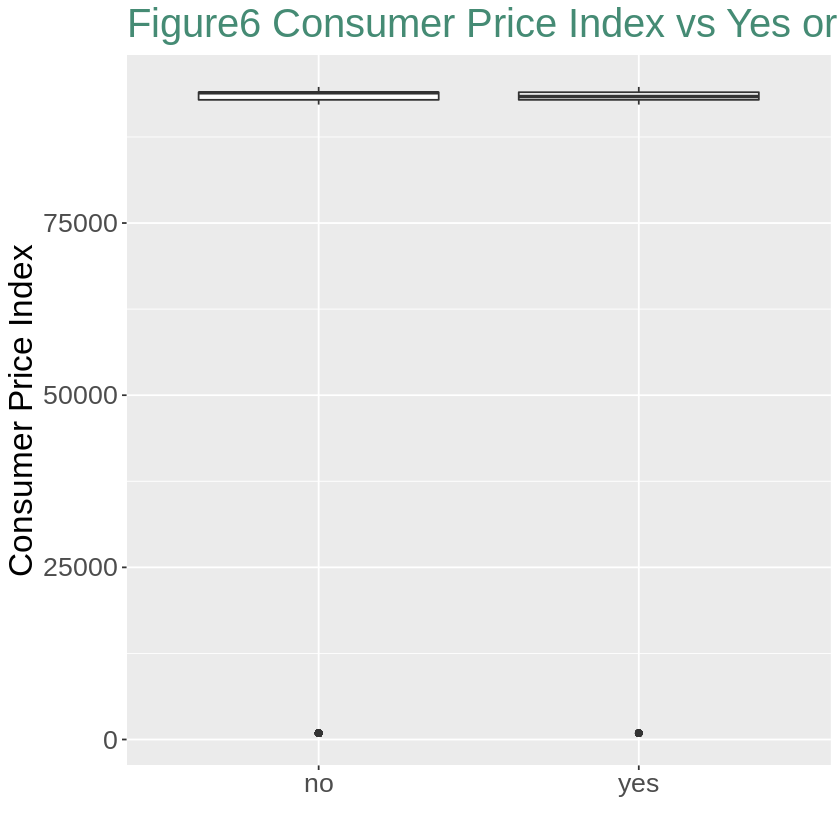

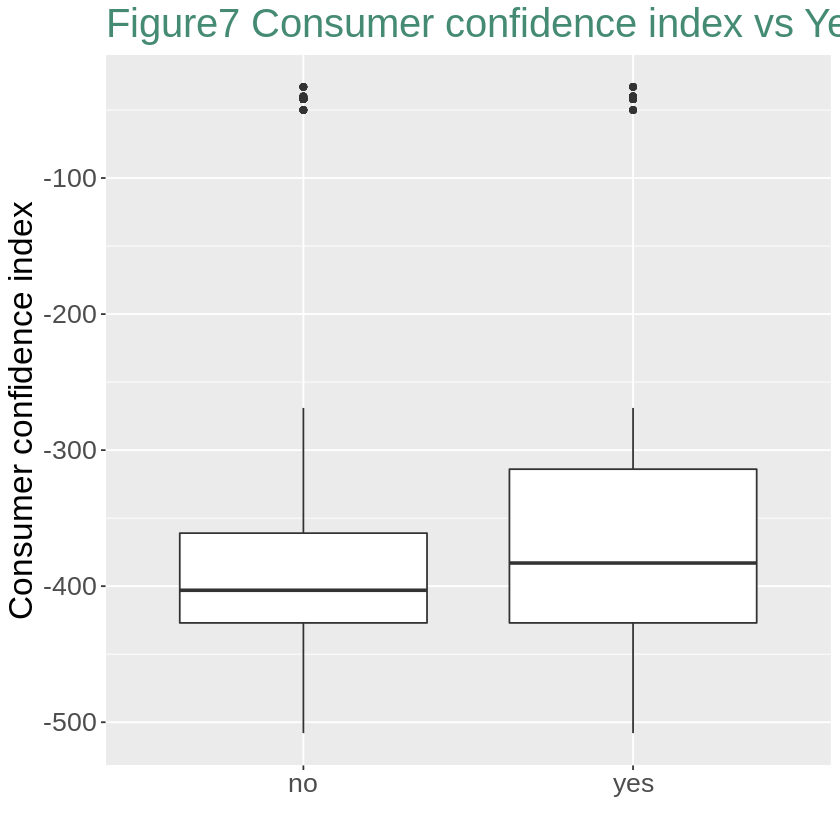

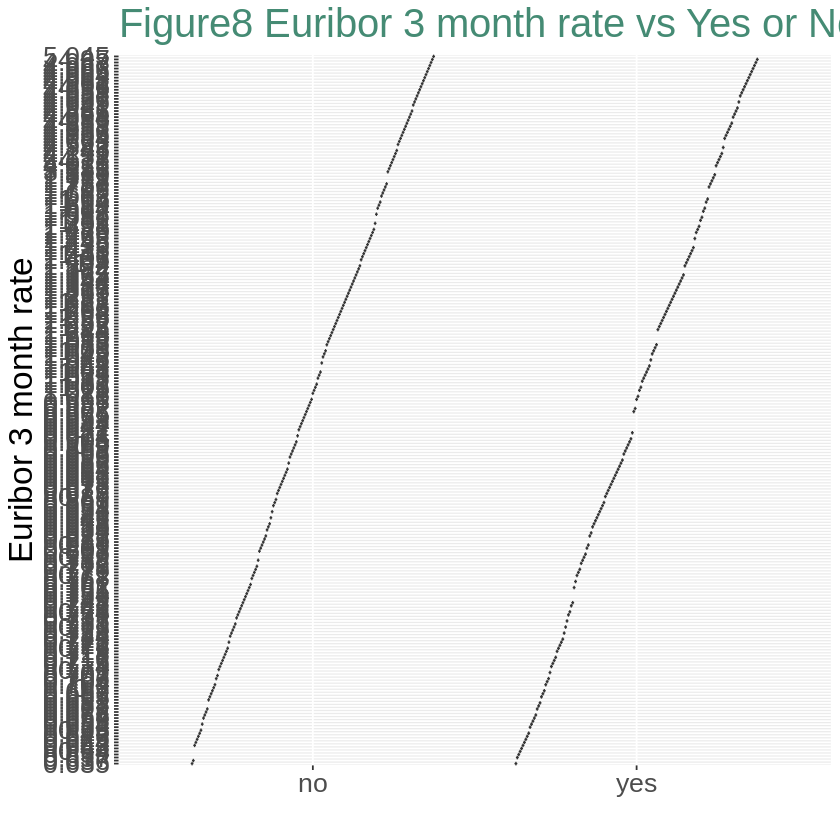

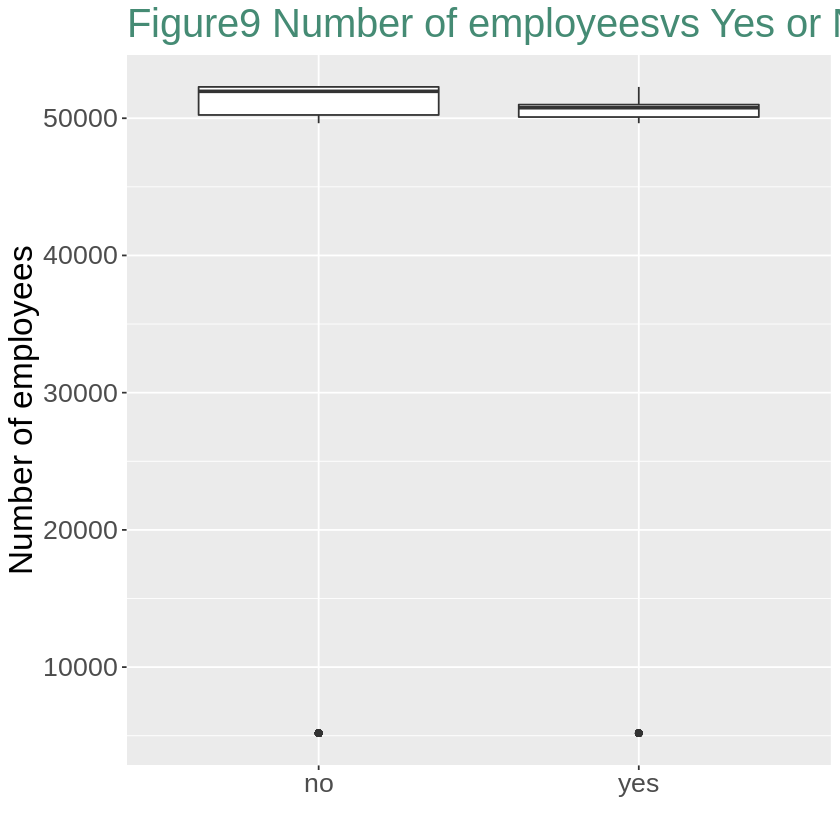

TableGrob (1 x 9) "arrange": 9 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]
4 4 (1-1,4-4) arrange gtable[layout]
5 5 (1-1,5-5) arrange gtable[layout]
6 6 (1-1,6-6) arrange gtable[layout]
7 7 (1-1,7-7) arrange gtable[layout]
8 8 (1-1,8-8) arrange gtable[layout]
9 9 (1-1,9-9) arrange gtable[layout]

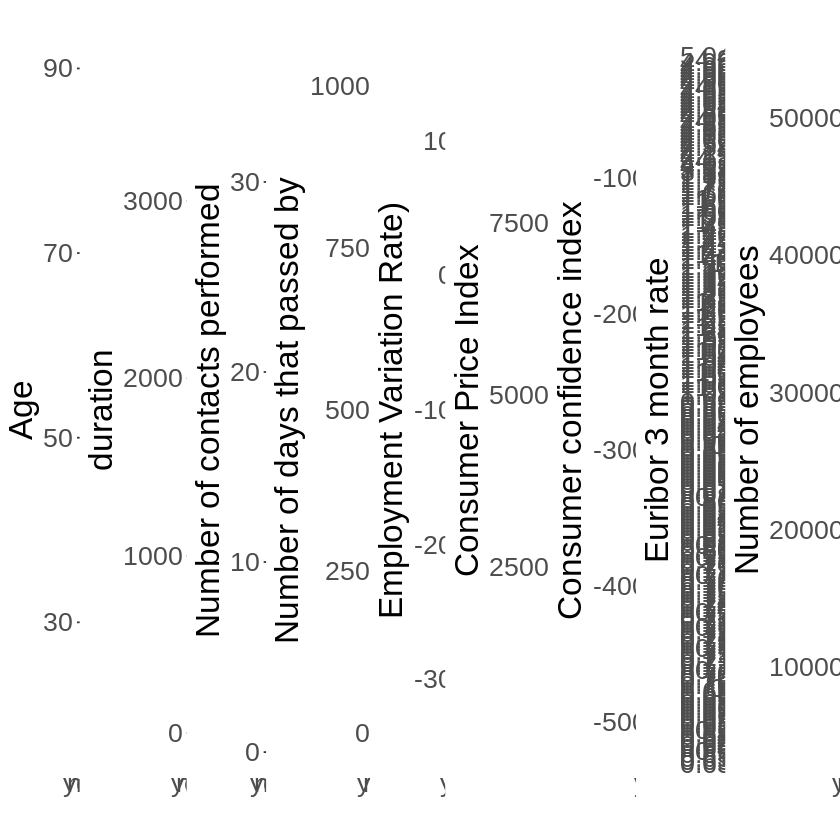

In [130]:
age_diag_plot <- ggplot(bank_data,aes(y=age,x=y)) +
    geom_boxplot()+
    labs(x="", y="Age") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure1 Age vs Yes or No")+
    theme(plot.title = element_text(color = "red1"))
age_diag_plot

duration_diag_plot <- ggplot(bank_data,aes(y=duration,x=y)) +
    geom_boxplot()+
    labs(x="", y="duration") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure2 duration vs Yes or No")+
    theme(plot.title = element_text(color = "sandybrown"))
duration_diag_plot

campaign_diag_plot <- ggplot(bank_data,aes(y=campaign,x=y)) +
    geom_boxplot()+
    labs(x="", y="Number of contacts performed") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure3 Campaign vs Yes or No")+
    theme(plot.title = element_text(color = "yellow2"))
campaign_diag_plot

pdays_diag_plot <- ggplot(bank_data,aes(y=pdays,x=y)) +
    geom_boxplot()+
    labs(x="", y="Number of days that passed by") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure4 Pdays vs Yes or No")+
    theme(plot.title = element_text(color = "palegreen2"))
pdays_diag_plot


emp_var_rate_diag_plot <- ggplot(bank_data,aes(y=emp_var_rate,x=y)) +
    geom_boxplot()+
    labs(x="", y="Employment Variation Rate)") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure5 Employment Variation Rate vs Yes or No")+
    theme(plot.title = element_text(color = "aquamarine4"))
emp_var_rate_diag_plot

cons_price_idx_diag_plot <- ggplot(bank_data,aes(y=cons_price_idx,x=y)) +
    geom_boxplot()+
    labs(x="", y="Consumer Price Index") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure6 Consumer Price Index vs Yes or No")+
    theme(plot.title = element_text(color = "lightskyblue"))
cons_price_idx_diag_plot

cons_conf_idx_diag_plot <- ggplot(bank_data,aes(y=cons_conf_idx,x=y)) +
    geom_boxplot()+
    labs(x="", y="Consumer confidence index") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure7 Consumer confidence index vs Yes or No")+
    theme(plot.title = element_text(color = "mediumpurple2"))
cons_conf_idx_diag_plot

euribor_3m_diag_plot <- ggplot(bank_data,aes(y=euribor_3m,x=y)) +
    geom_boxplot()+
    labs(x="", y="Euribor 3 month rate") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure8 Euribor 3 month rate vs Yes or No")+
    theme(plot.title = element_text(color = "pink2"))
euribor_3m_diag_plot

nr_employed_diag_plot <- ggplot(bank_data,aes(y=nr_employed,x=y)) +
    geom_boxplot()+
    labs(x="", y="Number of employees") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure9 Number of employeesvs Yes or No")+
    theme(plot.title = element_text(color = "aquamarine4"))
nr_employed_diag_plot



In [51]:
# Compute sample means
sample_means <- bank_data_sample %>%
                group_by(y) %>%
                summarize(mean = mean(duration))

# Compute difference in sample means between call duration of a successful outcome and a failure
sample_means_diff <- sample_means%>%
                    pivot_wider(names_from = y, values_from = mean)%>%
                    transmute(diff = yes - no)

number_rows <- bank_data_sample %>%
            nrow()

# Compute sample standard deviations
sample_sd <- bank_data_sample%>%
            group_by(y) %>%
            summarize(sd = sd(duration))

In [47]:
# Bootstrap distribution
# Perform the resampling with replacement of n size of from original sample
resample_yes <- bank_data_sample %>%
            filter(y == "yes")%>%
            rep_sample_n(size = number_rows, reps = 500, replace = TRUE)

# Compute sample mean
resample_mean_yes <- resample_yes %>%
                 group_by(replicate)%>%
                 summarize(mean_yes = mean(duration))

# Perform the resampling with replacement of n size of from original sample
resample_no <- bank_data_sample %>%
            filter(y == "no")%>%
            rep_sample_n(size = number_rows, reps = 500, replace = TRUE)

# Compute sample mean
resample_mean_no <- resample_no %>%
                 group_by(replicate)%>%
                 summarize(mean_no = mean(duration))

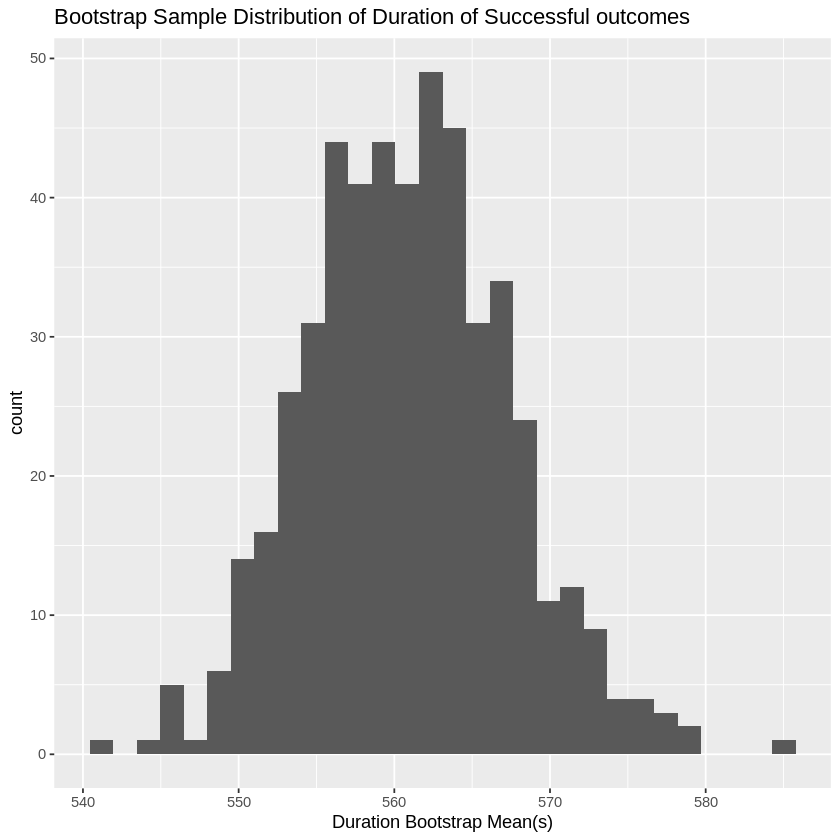

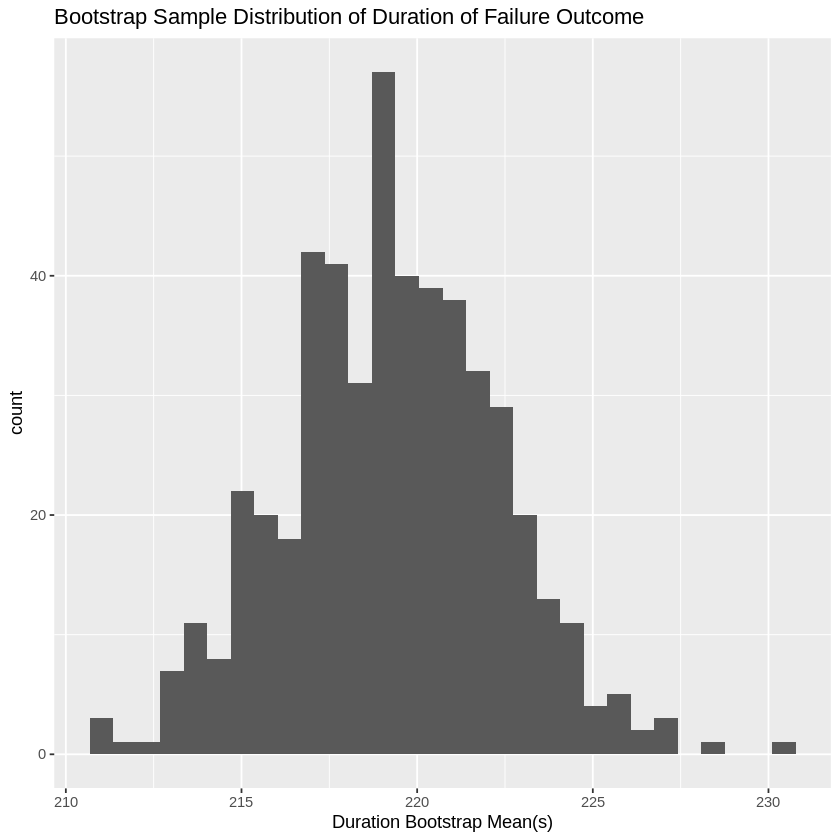

In [49]:
# Visualize the variation using a histogram
bootstrap_distribution_yes <- resample_mean_yes%>%
                            ggplot(aes(x = mean_yes))+
                            geom_histogram(bins = 30)+
                            ggtitle("Bootstrap Sample Distribution of Duration of Successful outcomes") +
                            xlab("Duration Bootstrap Mean(s)")

bootstrap_distribution_yes 

bootstrap_distribution_no <- resample_mean_no%>%
                            ggplot(aes(x = mean_no))+
                            geom_histogram(bins = 30)+
                            ggtitle("Bootstrap Sample Distribution of Duration of Failure Outcome") +
                            xlab("Duration Bootstrap Mean(s)")

bootstrap_distribution_no 

In [ ]:

options(repr.plot.width = 29, repr.plot.height = 10)

age_diag_plot <- ggplot(heart_train,aes(y=age,x=diagnosis)) +
    geom_boxplot()+
    labs(x="Heart Diagnosis", y="Age (Year)") +
    theme(text=element_text(size=20))+      
    labs(title = "Figure1.2 age vs diagnosis ")+
    theme(plot.title = element_text(color = "chocolate3"))

## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30> Methods

## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30> Reference